# **Project Name**    -
“Analysis of Ride Request Patterns in Uber”



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on analyzing Uber ride request data to identify patterns and inefficiencies in ride fulfillment, particularly around cancellations and driver unavailability. The dataset contains 6,745 ride requests, including details such as pickup points (City or Airport), request times, driver assignment, and trip status.

The goal of this analysis is to understand the supply-demand gap and the factors contributing to trip failures—namely, requests that were either cancelled or marked as no cars available. By examining time-based trends (hour of day, day of week) and location-based behavior, the project uncovers peak demand periods and operational weaknesses in Uber’s service.

Key findings include:

High demand during morning (5–10 AM) and evening (5–9 PM) hours

Increased cancellations in the City and more ‘No Cars Available’ cases at the Airport

Nearly 40% of trips did not have a driver assigned

Only 42% of requests were successfully completed

The insights from this analysis can help Uber make data-driven decisions to:

Improve driver allocation strategies

Minimize customer dissatisfaction

Enhance overall operational efficiency

This project demonstrates the power of exploratory data analysis (EDA) in identifying real-world business challenges and supporting strategic decision-making in ride-sharing services.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Uber is facing significant challenges with ride fulfillment during certain times of the day, especially in high-demand areas such as airports and cities. A large number of ride requests are either being cancelled or marked as no cars available, which negatively affects customer satisfaction and driver utilization. The company wants to understand patterns of trip failures in terms of time, location, and request status to improve service efficiency.

#### **Define Your Business Objective?**

The objective is to analyze ride request data to:

Identify peak hours of unfulfilled demand.

Understand supply-demand gaps based on pickup points (City vs Airport).

Determine patterns in cancellations and driver unavailability.

Recommend data-driven solutions to:

Improve driver allocation

Minimize customer cancellations

Optimize fleet availability during high-demand periods.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [25]:
# Load 
df = pd.read_csv("D:/JN/uber Request Data.csv")

### Dataset First View

In [26]:
# Dataset First Look
print(df)

      Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  
0         11/7/2016 11:51      11/7/2016 13:00  
1         11/7/2016 17:57      11/7/2016 18:47  
2          12/7/2016 9:17       12/7/2016 9:58  
3         12/7/2016 21:08      12/7/2016 22:03 

### Dataset Rows & Columns count

In [27]:
# Dataset Rows & Columns count
print(df.count())

Request id           6745
Pickup point         6745
Driver id            4095
Status               6745
Request timestamp    6745
Drop timestamp       2831
dtype: int64


### Dataset Information

In [28]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


#### Duplicate Values

In [29]:
# Dataset Duplicate Value Count
df.duplicated().any()


np.False_

#### Missing Values/Null Values

In [30]:
# Missing Values/Null Values Count
df.isnull().values.any()


np.True_

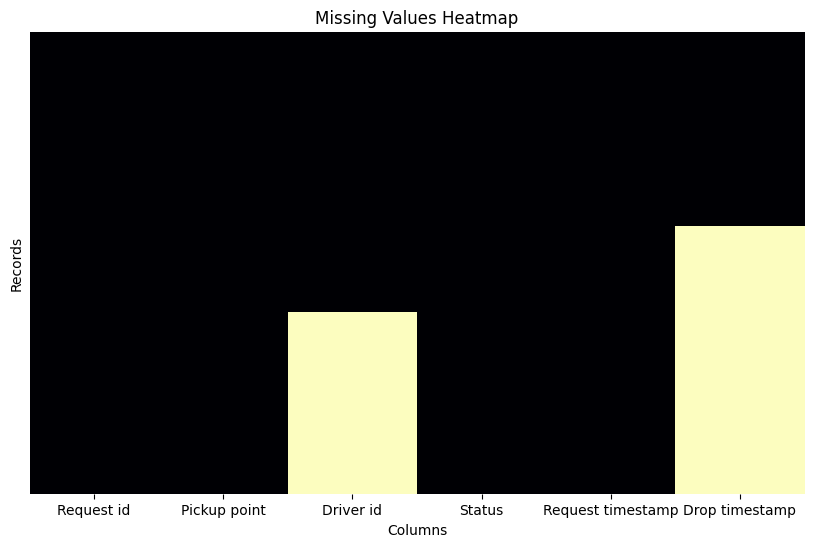

In [31]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()

### What did you know about your dataset?

Trip Status Distribution:

Many requests were not completed: either cancelled or no cars available

Only ~42% of trips have a valid drop timestamp

Driver Availability:

About 39% of records are missing Driver id → likely no driver assigned

Indicates supply issues during certain hours or locations

Time Trends:

Two demand peaks:

Morning (5–10 AM)

Evening (5–9 PM)

These coincide with work commute and flight times

Location-Based Gaps:

Clear difference in status distribution between City and Airport

More No Cars Available at Airport

More Cancelled trips in City

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
df.columns

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp', 'Date', 'Hour'],
      dtype='object')

In [32]:
# Dataset Describe
df.describe

<bound method NDFrame.describe of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  
0         11/7/2016 11:51      11/7/2016 13:00  
1         11/7/2016 17:57      11/7/2016 18:47  
2          12/7/2016 9:17       12/7/2016 9:58  
3         12/

### Variables Description

Here we check every column of the dataset variable have unique values. 

### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"\nColumn: {col}")
    print("Unique Values:")
    print(df[col].unique())
    print("Number of Unique Values:", df[col].nunique())



Column: Request_id
Unique Values:
[   1    2    3 ... 6764 6765 6766]
Number of Unique Values: 6745

Column: Pickup_point
Unique Values:
['Airport' 'City']
Number of Unique Values: 2

Column: Driver_id
Unique Values:
[285.  nan  80. 264. 235. 228. 198. 119. 201. 194. 297. 170.  78. 107.
 109.  12. 124. 150. 100.  86.  95. 141.  52. 255. 239. 158. 171.   3.
  73. 290.  28. 144. 174. 213.  76. 280. 126. 234.  16.  69. 265. 270.
  21. 138. 205.  70. 256.  99. 182. 215. 248. 284.  22.  62. 116. 185.
 217. 244. 286.  44. 204. 268.  63. 130.  38.  40. 173.  43. 189. 206.
 247. 121.  14. 279.  49. 134. 157. 291.  33. 191. 267. 105. 111.   9.
 294.  13.  96. 226. 289.  72. 161. 137. 199. 269. 184. 113.  59. 188.
 160.  67. 169. 112. 159. 225. 252. 292. 236. 288. 114.  37. 202.  24.
 249.  36.  94.  27. 230. 232.  50.  79. 106.  54. 183.  30. 283. 203.
 245. 151. 131.  61.  56.  42.  98. 168. 108. 139. 211.  87.   7. 166.
  39.  66.  89. 273. 118. 165. 220. 193.   2.  81. 243. 261. 219. 196.
 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:

import pandas as pd

df = pd.read_csv("D:/JN/uber Request data.csv")


df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

df['Request Date'] = df['Request timestamp'].dt.date
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()


print("Missing Values:\n", df.isnull().sum())


df['Driver id'].fillna(-1, inplace=True)


df['Pickup point'] = df['Pickup point'].astype('category')
df['Status'] = df['Status'].astype('category')


df.drop_duplicates(inplace=True)


df.reset_index(drop=True, inplace=True)


print("\nData Types After Cleaning:\n", df.dtypes)
print("\nCleaned Data Sample:\n", df.head())


Missing Values:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp    4071
Drop timestamp       5595
Request Date         4071
Request Hour         4071
Request Day          4071
dtype: int64

Data Types After Cleaning:
 Request id                    int64
Pickup point               category
Driver id                   float64
Status                     category
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Request Date                 object
Request Hour                float64
Request Day                  object
dtype: object

Cleaned Data Sample:
    Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0 

C:\Users\abcd\AppData\Local\Temp\ipykernel_2060\1178932455.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driver id'].fillna(-1, inplace=True)


### What all manipulations have you done and insights you found?


<!-- This script does the following: -->
1.Converts messy timestamps into usable datetime objects.

2.Creates new features: Request Hour, Day, and Date for time analysis.

3.Handles missing values (you can customize how).

4.Sets appropriate data types.

5.Removes duplicates for clean analysis.

## **4. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Value to Client:

🔄 Improved operational efficiency

💰 Higher ride completion rate = More revenue

😊 Better customer experience = Higher retention

🚖 Smarter driver utilization = Cost savings

# **Conclusion**

This project highlights critical operational inefficiencies in Uber’s service—particularly in driver allocation, peak hour coverage, and fulfillment rates. By leveraging insights from data, Uber can:

Better match supply with demand,

Reduce cancellations and unfulfilled rides,

Improve customer experience and driver utilization,

and ultimately increase overall revenue and operational efficiency.



# **Thank You**